In [1]:
%matplotlib notebook
import math
import gmplot
import gmaps
import gmaps.datasets
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import IFrame
from sklearn import linear_model
from pyproj import Transformer


# Chargement des coordonnées GPS et SFM des poses

In [2]:
df = pd.read_csv('mesh_df.csv', skipinitialspace=True)
print(df)
print(df.dtypes)

             path      poseId  gpsAltitude  gpsAltitudeRef      gpsLatitude  \
0    DJI_0056.JPG     7125557      290.372             0.0  43  41  49.1933   
1    DJI_0108.JPG     7409112      303.990             0.0  43  41  50.7879   
2    DJI_0180.JPG    16488355      267.267             0.0  43  41  49.6268   
3    DJI_0058.JPG    27139231      290.372             0.0  43  41  49.3589   
4    DJI_0160.JPG    28172416      274.790             0.0  43  41  49.9262   
..            ...         ...          ...             ...              ...   
226  DJI_0045.JPG  2055834818      290.472             0.0  43  41  49.6663   
227  DJI_0170.JPG  2068300110      272.590             0.0  43  41  49.8504   
228  DJI_0105.JPG  2088371203      303.990             0.0  43  41  50.6742   
229  DJI_0145.JPG  2093198778      272.890             0.0  43  41  49.8211   
230  DJI_0193.JPG  2115453006      272.167             0.0  43  41  50.1669   

    gpsLatitudeRef    gpsLongitude gpsLongitudeRef 

In [3]:
alt = df[~df['x'].isnull()]['gpsAltitude']
lat = df[~df['x'].isnull()]['gpsDecLatitude']
lon = df[~df['x'].isnull()]['gpsDecLongitude']
x = df[~df['x'].isnull()]['x']
y = df[~df['x'].isnull()]['y']
z = df[~df['x'].isnull()]['z']

<IPython.core.display.Javascript object>


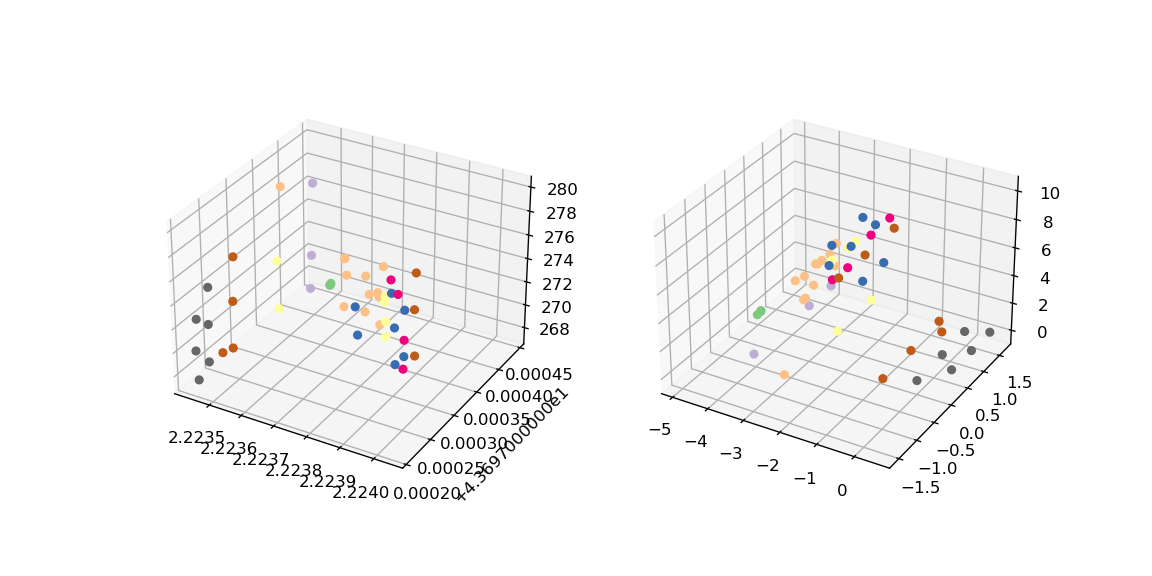

In [4]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(lon, lat, alt, c=x, cmap=plt.get_cmap('Accent'), alpha=1)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(x, y, z, c=x, cmap=plt.get_cmap('Accent'), alpha=1)
plt.show()

# Regression linéaire

In [5]:
clf = linear_model.LinearRegression()
clf.fit(df[~df['x'].isnull()][['x','y','z']], df[~df['x'].isnull()][['gpsDecLatitude','gpsDecLongitude','gpsAltitude']])
clf.coef_

array([[-4.34772448e-05,  1.20613608e-06, -1.26465059e-06],
       [-6.44862651e-06, -6.90500392e-06,  5.66703250e-05],
       [ 4.19517050e-01, -4.40424222e+00, -1.25074637e-01]])

In [7]:
pred = clf.predict(df[~df['x'].isnull()][['x','y','z']])
pred

array([[ 43.69727115,   2.22395256, 276.75833885],
       [ 43.69721081,   2.22343979, 273.14477017],
       [ 43.69727884,   2.22393109, 277.77341933],
       [ 43.69726743,   2.22344873, 268.04259692],
       [ 43.69733476,   2.22380628, 270.41167212],
       [ 43.69730319,   2.22390917, 273.05873442],
       [ 43.697333  ,   2.22381319, 269.67155807],
       [ 43.69726405,   2.22345177, 275.60570808],
       [ 43.69733191,   2.22381388, 272.8698008 ],
       [ 43.69739096,   2.22352543, 267.73592014],
       [ 43.69729513,   2.22377057, 270.61031396],
       [ 43.697295  ,   2.22377188, 273.19616585],
       [ 43.69730307,   2.22390934, 275.64444726],
       [ 43.69736808,   2.2236435 , 272.7473657 ],
       [ 43.69737481,   2.22364515, 268.41867629],
       [ 43.69735767,   2.22377686, 274.40004362],
       [ 43.69736021,   2.22376511, 271.78845872],
       [ 43.69737609,   2.2237055 , 270.11751245],
       [ 43.69736354,   2.22376469, 268.93829921],
       [ 43.69731546,   2.22393

<IPython.core.display.Javascript object>


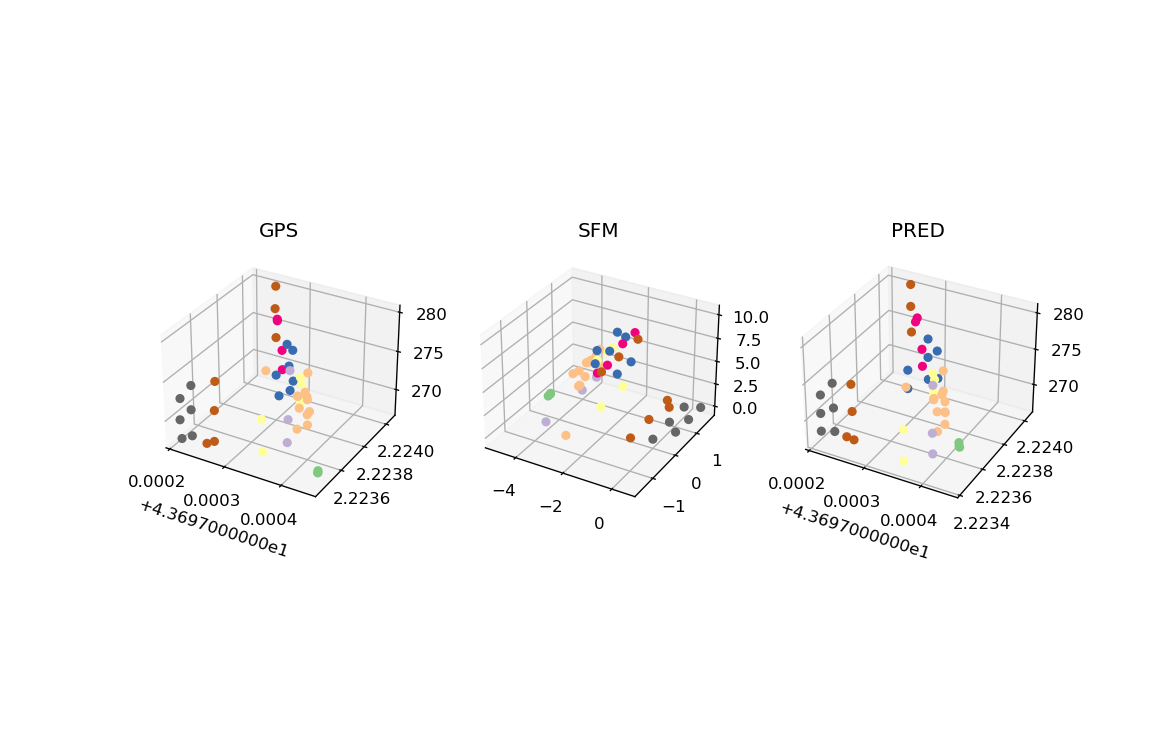

In [9]:
fig = plt.figure()

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(lat, lon, alt, c=x, cmap=plt.get_cmap('Accent'), alpha=1)
ax.set_title('GPS')

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(x, y, z, c=x, cmap=plt.get_cmap('Accent'), alpha=1)
ax.set_title('SFM')

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(pred[:,0], pred[:,1], pred[:,2], c=x, cmap=plt.get_cmap('Accent'), alpha=1)
ax.set_title('PRED')
plt.show()

# Chargement du nuage de points

In [10]:
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper
with open('sfm.sfm') as f:
    sfm = load(f, Loader=Loader)

In [25]:
print(sfm.keys())
# for s in sfm['structure'] :
#    print(s['X'])
print(len(sfm['structure']))
print(sfm['structure'][0]['X'])

dict_keys(['version', 'featuresFolders', 'matchesFolders', 'views', 'intrinsics', 'poses', 'structure'])
64857
['-0.82415688037872314', '-1.7172108888626099', '6.9778409004211426']


In [31]:
d = []
for s in sfm['structure'] :
    d.append({
        'x' : s['X'][0],
        'y' : s['X'][1],
        'z' : s['X'][2]
    })

In [32]:
pcloud = pd.DataFrame(d)
pcloud

,x,y,z
0,-0.82415688037872314,-1.7172108888626099,6.9778409004211426
1,-0.86668902635574341,-1.7213484048843384,7.0441746711730957
2,-0.89494651556015015,-1.7628254890441895,7.2176284790039062
3,-0.91285383701324463,-1.7516289949417114,7.2488436698913574
4,-1.3755470514297485,-1.0788233280181885,7.939234733581543
...,...,...,...
64852,-0.10412130504846573,1.2353638410568237,1.5242047309875488
64853,0.25677642226219177,0.89193373918533325,1.4524648189544678
64854,0.299324631690979,0.93649303913116455,1.4546202421188354
64855,-0.11707122623920441,1.2251855134963989,1.5248430967330933


In [34]:
pcloud_pred = clf.predict(pcloud)
pcloud_pred

array([[ 43.69725633,   2.22385957, 281.44302492],
       [ 43.69725809,   2.22386363, 281.43510791],
       [ 43.69725905,   2.22387393, 281.58423386],
       ...,
       [ 43.69721767,   2.223521  , 270.9176045 ],
       [ 43.69723603,   2.22352567, 269.46266466],
       [ 43.69727058,   2.22353661, 271.95826605]])

# Transformation de WGS84 vers LAMBERT93

In [35]:
transformer = Transformer.from_crs('epsg:4326', 'epsg:2154')

transformer.transform(2, 42)

(6133846.713398826, 2563316.179841232)

In [38]:
dL93 = []
for row in pcloud_pred :
    x,y = transformer.transform(row[1], row[0])
    dL93.append({
        'xL93' : x,
        'yL93' : y
    })
pcloud_predL93 = pd.DataFrame(dL93)
pcloud_predL93

,xL93,yL93
0,6.333606e+06,2.710501e+06
1,6.333606e+06,2.710501e+06
2,6.333605e+06,2.710503e+06
3,6.333605e+06,2.710503e+06
4,6.333605e+06,2.710509e+06
...,...,...
64852,6.333627e+06,2.710457e+06
64853,6.333625e+06,2.710456e+06
64854,6.333625e+06,2.710456e+06
64855,6.333627e+06,2.710457e+06


In [39]:
dL93 = []
for row in pred :
    x,y = transformer.transform(row[1], row[0])
    dL93.append({
        'xL93' : x,
        'yL93' : y
    })
poses_predL93 = pd.DataFrame(dL93)
poses_predL93

,xL93,yL93
0,6.333601e+06,2.710513e+06
1,6.333630e+06,2.710445e+06
2,6.333603e+06,2.710511e+06
3,6.333636e+06,2.710450e+06
4,6.333619e+06,2.710500e+06
5,6.333608e+06,2.710510e+06
6,6.333619e+06,2.710500e+06
7,6.333635e+06,2.710450e+06
8,6.333618e+06,2.710500e+06
9,6.333646e+06,2.710469e+06
